In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Load dataset
X, y = load_wine(return_X_y=True)

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Preprocess data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Create RF classifier
rfc = RandomForestClassifier()

#Train model
rfc.fit(X_train, y_train)

#Evaluate model
accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

#Make predictions
y_pred = rfc.predict(X_test)

#Classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



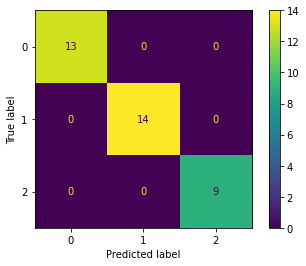

In [2]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, X_test, y_test)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
rf_grid = {'max_samples': [0.1, 0.2, 0.3, 0.4],
                'max_features': [1, 2],
                'n_estimators':[10, 50, 100],
                'max_depth': [8, 9, 10]
                }
rf_k = KFold(n_splits=5)
rf = GridSearchCV(RandomForestClassifier(), rf_grid, cv=rf_k)
rf.fit(X_train, y_train)
predictions2 = rf.predict(X_test)
print(classification_report(y_test, predictions2))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



1.0

In [4]:
from sklearn.model_selection import cross_val_score
rfc_cross_validation = cross_val_score(rfc, X_train, y_train, cv=10)
print(rfc_cross_validation)
print('Mean Score =', rfc_cross_validation.mean().round(5)*100,'%')

[0.93333333 0.93333333 1.         1.         1.         0.92857143
 1.         1.         1.         1.        ]
Mean Score = 97.952 %
